# Notebook for the preprocessing and EDA steps
Here we progress with the feature engineering and baseline model steps.

In [3]:
from pathlib import Path
import pandas as pd
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.preprocessing import LabelEncoder
from collections import Counter
pd.set_option('display.max_rows', 30)
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score

## Upload the dataset

In [9]:
# Read pickle file
wok_dir = Path.cwd() / 'datasets/'
filename = 'facies_dataset_preprocess.parquet'
path_file = wok_dir / filename
data = pd.read_parquet(path_file) # Read file

data.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,FaciesLabels
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000,FSiS
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979,FSiS
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957,FSiS
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936,FSiS
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915,FSiS


In [10]:
# Check dtype - it matches with preprocessing step
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4149 entries, 0 to 4148
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Facies        4149 non-null   int64   
 1   Formation     4149 non-null   object  
 2   Well Name     4149 non-null   category
 3   Depth         4149 non-null   float64 
 4   GR            4149 non-null   float64 
 5   ILD_log10     4149 non-null   float64 
 6   DeltaPHI      4149 non-null   float64 
 7   PHIND         4149 non-null   float64 
 8   PE            4149 non-null   float64 
 9   NM_M          4149 non-null   int64   
 10  RELPOS        4149 non-null   float64 
 11  FaciesLabels  4149 non-null   object  
dtypes: category(1), float64(7), int64(2), object(2)
memory usage: 361.1+ KB


## Feature engineering

In [10]:
# Define the colors 
facies_colors = ['xkcd:goldenrod', 'xkcd:orange','xkcd:sienna','xkcd:violet',
       'xkcd:olive','xkcd:turquoise', "xkcd:yellowgreen", 'xkcd:indigo', 'xkcd:blue']

facies_labels = ['SS', 'CSiS', 'FSiS', 'SiSh', 
                 'MS',  'WS', 'D','PS', 'BS']
#facies_color_map is a dictionary that maps facies labels to their respective colors
facies_color_map = {}
for ind, label in enumerate(facies_labels):
    facies_color_map[label] = facies_colors[ind]

# Function for setting the color label
def label_facies(row, labels):
    return labels[ row['Facies'] -1]
#establish facies label str    
df.loc[:,'FaciesLabels'] = df.apply(lambda row: label_facies(row, facies_labels), axis=1)

In [9]:
df.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,FaciesLabels
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000,FSiS
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979,FSiS
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957,FSiS
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936,FSiS
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915,FSiS


## Data visualization

In [11]:
# Copy dataset to data
data=df

In [12]:
# Function for making log-plot
def make_facies_log_plot(logs, facies_colors):
    #make sure logs are sorted by depth
    logs = logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')
    
    ztop=logs.Depth.min(); zbot=logs.Depth.max()
    
    cluster=np.repeat(np.expand_dims(logs['Facies'].values,1), 100, 1)
    
    f, ax = plt.subplots(nrows=1, ncols=6, figsize=(12, 6))
    ax[0].plot(logs.GR, logs.Depth, '-g',  alpha=0.8, lw = 0.9)
    ax[1].plot(logs.ILD_log10, logs.Depth, '-b',  alpha=0.8, lw = 0.9)
    ax[2].plot(logs.DeltaPHI, logs.Depth, '-k',  alpha=0.8, lw = 0.9)
    ax[3].plot(logs.PHIND, logs.Depth, '-r',  alpha=0.8, lw = 0.9)
    ax[4].plot(logs.PE, logs.Depth, '-c',  alpha=0.8, lw = 0.9)
    im=ax[5].imshow(cluster, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=9)
    
    divider = make_axes_locatable(ax[5])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im, cax=cax)
    cbar.set_label((5*' ').join([' SS ', 'CSiS', 'FSiS', 
                                'SiSh', ' MS ', ' WS ', ' D  ', 
                                ' PS ', ' BS ']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    for i in range(len(ax)-1):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
    
    ax[0].set_xlabel("GR")
    ax[0].set_xlim(logs.GR.min(),logs.GR.max())
    ax[1].set_xlabel("ILD_log10")
    ax[1].set_xlim(logs.ILD_log10.min(),logs.ILD_log10.max())
    ax[2].set_xlabel("DeltaPHI")
    ax[2].set_xlim(logs.DeltaPHI.min(),logs.DeltaPHI.max())
    ax[3].set_xlabel("PHIND")
    ax[3].set_xlim(logs.PHIND.min(),logs.PHIND.max())
    ax[4].set_xlabel("PE")
    ax[4].set_xlim(logs.PE.min(),logs.PE.max())
    ax[5].set_xlabel('Facies')
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([])
    ax[5].set_xticklabels([])
    f.suptitle('Well: %s'%logs.iloc[0]['Well Name'], fontsize=14,y=0.94)

### Log-plot

In [14]:
data['Well Name'].unique() # Well names that extract rocks, so we can visualize the log-plot for each name

['SHRIMPLIN', 'ALEXANDER D', 'SHANKLE', 'LUKE G U', 'KIMZEY A', 'CROSS H CATTLE', 'NOLAN', 'Recruit F9', 'NEWBY', 'CHURCHMAN BIBLE']
Categories (10, object): ['ALEXANDER D', 'CHURCHMAN BIBLE', 'CROSS H CATTLE', 'KIMZEY A', ..., 'NOLAN', 'Recruit F9', 'SHANKLE', 'SHRIMPLIN']

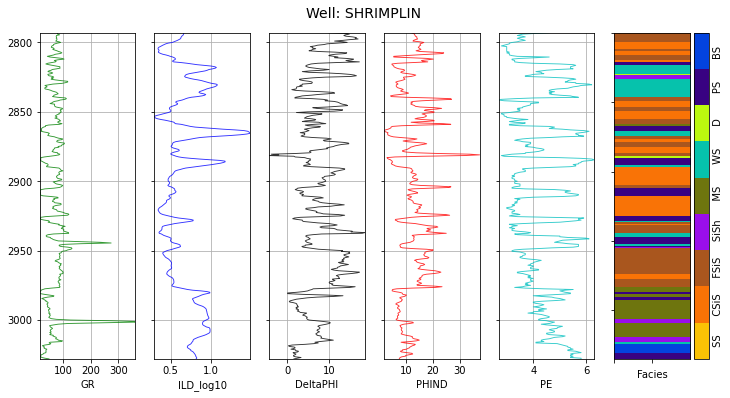

In [16]:
slct_well_name = 'SHRIMPLIN'
make_facies_log_plot(
    data[data['Well Name'] == slct_well_name],
    facies_colors)
# plt.savefig("Well_example.png", dpi=400)

### Histogram

In [18]:
# Target variable
cn = Counter(data.FaciesLabels)
for i,j in cn.items():
    percent = j / len(data) * 100
    print('Class=%s, Count=%d, Percentage=%.3f%%' % (i, j, percent))

Class=FSiS, Count=780, Percentage=18.800%
Class=CSiS, Count=940, Percentage=22.656%
Class=PS, Count=686, Percentage=16.534%
Class=WS, Count=582, Percentage=14.027%
Class=D, Count=141, Percentage=3.398%
Class=SiSh, Count=271, Percentage=6.532%
Class=MS, Count=296, Percentage=7.134%
Class=BS, Count=185, Percentage=4.459%
Class=SS, Count=268, Percentage=6.459%


Text(0, 0.5, 'Frequency')

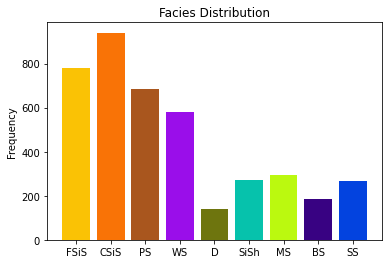

In [19]:
# Histogram plot
plt.bar(cn.keys(), cn.values(), color=facies_colors )
plt.title('Facies Distribution')
plt.ylabel('Frequency')
# plt.savefig("bar_plot.png", dpi=400)

We have the following:
 - The dataset is imbalanced as expected and so **oversampling** techniques are necessary (undersampling techniques are not recommended for such a small dataset)
 - There is 4 fancies major class (FSiS, CSiS, PS, WS)

### Cross-plot

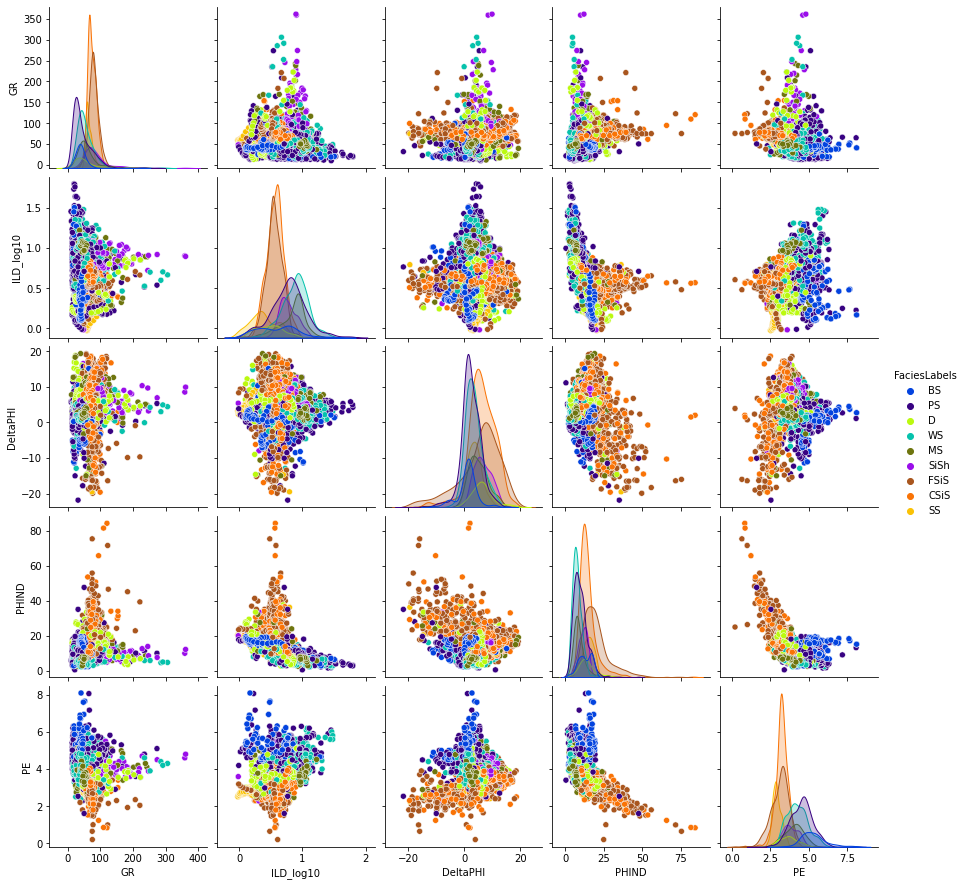

In [20]:
sns_plot = sns.pairplot(data.drop(['Well Name','Facies','Formation','Depth','NM_M','RELPOS'],axis=1),
             hue='FaciesLabels', palette=facies_color_map,
             hue_order=list(reversed(facies_labels)))
sns_plot.savefig('cross_plots.png')

To visualize multiple pairwise bivariate distributions in a dataset, we may use the pairplot() function from the seaborn library. It shows the relationship for the combination of variables in the dataset in the matrix format with a univariate distribution plot in diagonal. It is clear that PE log has a non-linear relationship with average porosity. Other pairs do not show a clear pattern. The distribution pattern in diagonal shows that each label class (facies) with respect to each feature has acceptable separation although there is a strong overlap for various classes. The ideal pattern can be assumed as a clear separation of distribution plots in tall bell shape normal distribution graph.

In [21]:
# Check the correlation
data.corr()

,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
Facies,1.000000,0.306688,-0.386677,0.383166,-0.235005,-0.356453,0.704231,0.852721,0.076761
Depth,0.306688,1.000000,-0.088636,0.202272,0.067694,-0.095834,0.277577,0.282318,0.001537
GR,-0.386677,-0.088636,1.000000,-0.205855,0.178863,0.270729,-0.289023,-0.316284,-0.182051
ILD_log10,0.383166,0.202272,-0.205855,1.000000,-0.104827,-0.544416,0.384589,0.493570,0.088227
DeltaPHI,-0.235005,0.067694,0.178863,-0.104827,1.000000,-0.189355,0.011489,-0.177500,0.022470
PHIND,-0.356453,-0.095834,0.270729,-0.544416,-0.189355,1.000000,-0.573418,-0.481024,-0.033328
PE,0.704231,0.277577,-0.289023,0.384589,0.011489,-0.573418,1.000000,0.657089,0.018905
NM_M,0.852721,0.282318,-0.316284,0.493570,-0.177500,-0.481024,0.657089,1.000000,0.034015
RELPOS,0.076761,0.001537,-0.182051,0.088227,0.022470,-0.033328,0.018905,0.034015,1.000000


In this dataset, we are not facing with collinearity.

## Feature engineering
It is common to have missing value in the dataset. To see the sum of null values for each column of features:

In [23]:
# New copy for the Feat eng
data_fe = data

data_fe.isna().sum()

Facies            0
Formation         0
Well Name         0
Depth             0
GR                0
ILD_log10         0
DeltaPHI          0
PHIND             0
PE              917
NM_M              0
RELPOS            0
FaciesLabels      0
dtype: int64

*Voilá!* the PE col shows the 917 null values

In [24]:
# Find out which wells do not have PE
df_null = data_fe.loc[data_fe.PE.isna()]
df_null['Well Name'].unique()

['ALEXANDER D', 'KIMZEY A', 'Recruit F9']
Categories (10, object): ['ALEXANDER D', 'CHURCHMAN BIBLE', 'CROSS H CATTLE', 'KIMZEY A', ..., 'NOLAN', 'Recruit F9', 'SHANKLE', 'SHRIMPLIN']

There are several ways to deal with Null values in the dataset. The simplest approach is to drop the rows containing at least one null value. This can be logical with a bigger size dataset but with small-sized dataframes single points are important. We can impute null values with mean or from adjacent data points in columns. Filling with mean value will not affect data variance and therefore will not have an impact on prediction accuracy, though can create data bias. Another approach, which I will implement here, to employe machine learning models to predict missing values. This is the best way of dealing with this dataset because we have just a single feature missing from the dataset, PE. There is a meaningful correlation between this feature with others.

### Regression models for imputing the null values

In [25]:
# Import sklearn pkgs
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

Let us employe ML models to predict missing values. This is the best way of dealing with this dataset because we have just a single feature missing from the dataset. On the other hand, filling with ML prediction is much better than the single mean value because we are able to see ML correlation and accuracy by dividing data to train and test sets. Here, I will follow what is done in the tutorial, i.e. a Multi-Layer Perceptron Neural Network but we could use a much simpler method.

In [26]:
set_PE = data_fe[['Facies','Depth', 'GR', 'ILD_log10',
       'DeltaPHI', 'PHIND', 'PE', 'NM_M', 'RELPOS']].dropna()  # select features and target log that has value
X = set_PE[['Facies','Depth', 'GR', 'ILD_log10',
       'DeltaPHI', 'PHIND', 'NM_M', 'RELPOS']]  # feature selection without null value
XX = data_fe[['Facies','Depth', 'GR', 'ILD_log10',
       'DeltaPHI', 'PHIND', 'NM_M', 'RELPOS']]
y = set_PE['PE'] # target log
# scaling
scaler = StandardScaler()
X = scaler.fit_transform(X) # Data leakage!!!
X_b = scaler.fit_transform(XX)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Predict the null values
# %%time
MLP_pe = MLPRegressor(random_state=1, max_iter= 500).fit(X_train, y_train) #fit the model
MLP_pe.score(X_test, y_test) # examine accuracy

/home/peregrino/miniconda3/envs/sklearn_env/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


0.7760948012956089

In [29]:
# Assign the prediction to extra col `PE_pred`
data_fe['PE_pred'] = MLP_pe.predict(X_b)  # predict PE

In [30]:
data_fe['PE_pred']

0       3.467689
1       3.585520
2       3.548324
3       3.418684
4       3.507122
          ...   
4144    3.592282
4145    3.478787
4146    3.528055
4147    3.608175
4148    3.746971
Name: PE_pred, Length: 4149, dtype: float64

In [31]:
# Impute to the null values
data_fe.PE.fillna(data_fe.PE_pred, inplace =True) # fill NaN vakues with predicted PE

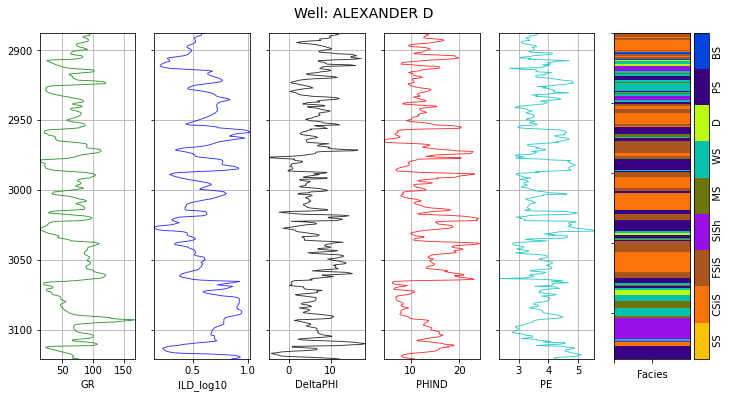

In [32]:
# Plot again the PE column
make_facies_log_plot(
    data[data['Well Name'] == 'ALEXANDER D'],
    facies_colors)
plt.savefig("predicted_PE.png", dpi=400)

In [35]:
# Remove predicted PE column
data_fe = data_fe.drop(columns=['PE_pred'])
data = data.drop(columns=['PE_pred'])